In [4]:
%matplotlib inline

import numpy as np
import pylab as plt
from imageio import imread
# you need to install ccgpack from "https://github.com/vafaei-ar/ccgpack"
import ccgpack as ccg
from skimage.transform import resize
cmap = plt.cm.jet

def data_loader():
    img = imread('./celeba/'+str(np.random.randint(1,10)).zfill(6)+'.jpg')
    img = np.flipud(img)
    return img

class Deformer(object):
    
    def __init__(self,data_loader,cl,size=0.5):
        
        img = data_loader()
        self.rows, self.cols, self.nchannel = img.shape
        self.nside = max(self.rows,self.cols)
        self.data_loader = data_loader
        self.size = size
        self.sfs = ccg.StochasticFieldSimulator(cl)
        
    def get_sample(self,coeff):
        
        m = self.sfs.simulate(nside=self.nside+1,size=self.size)
        m = coeff*m/m.max()
        img = self.data_loader()
        img_output,mx,my = ccg.deform(img,m)
        img_rec,_,_ = ccg.deform(img_output,m,inverse=1)

        return img,img_output,img_rec,[m,mx,my]

cl = np.load('../data/cl_planck_lensed.npy')

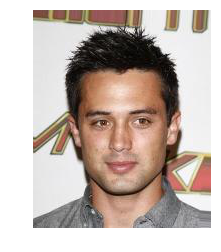

In [5]:
image = data_loader()
plt.imshow(image,origin='lower')
plt.axis('off');

In [6]:
deformer = Deformer(data_loader,cl,size=0.5)

Warning, deformation field dimensions are not compatible, it will be cropped!
Warning, deformation field dimensions are not compatible, it will be cropped!


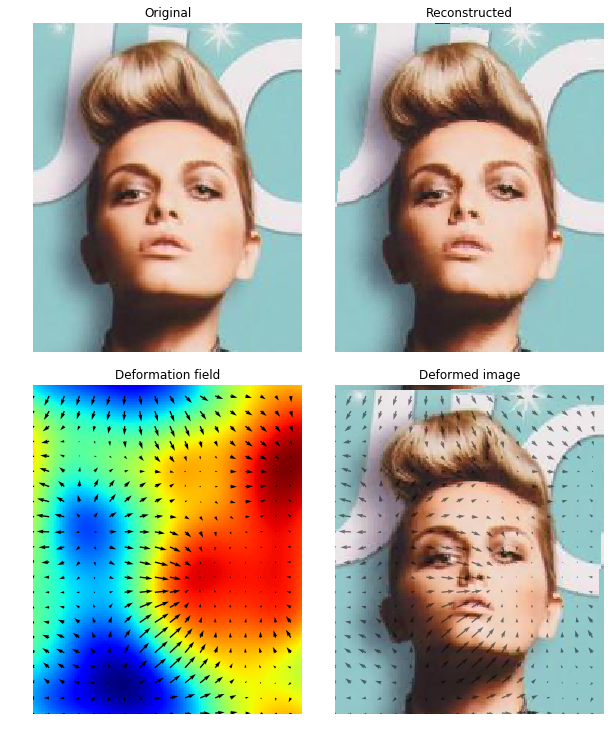

In [9]:
coeff = 200
rows,cols = deformer.rows, deformer.cols
img,img_output,img_rec,[m,mx,my] = deformer.get_sample(coeff)

X, Y = np.meshgrid(np.arange(cols), np.arange(rows)) 

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(10,12))
ax1.imshow(img,origin='lower')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(img_rec,origin='lower')
ax2.set_title('Reconstructed')
ax2.axis('off')

dx=dy=10
ax3.imshow(m[:rows,:cols],origin='lower', cmap=cmap)
# ax3.imshow(m[:rows,:cols]+coeff/10*np.mean(img_output,axis=2),origin='lower', cmap=cmap)
ax3.quiver(X[::dx,::dy], Y[::dx,::dy],my[:rows:dx,:cols:dy],mx[:rows:dx,:cols:dy], width=0.005,
               scale=coeff/1.5)
ax3.set_title('Deformation field')
ax3.axis('off')

ax4.imshow(img_output,origin='lower')
ax4.quiver(X[::dx,::dy], Y[::dx,::dy],my[:rows:dx,:cols:dy],mx[:rows:dx,:cols:dy], width=0.005,
               scale=coeff/1.5,alpha=0.5)
ax4.set_title('Deformed image')
ax4.axis('off')

plt.subplots_adjust(wspace=0.1,hspace=0.1 ,left=0.1, right=0.9, top=0.9, bottom=0.1)

In [379]:
# img = np.zeros((500,350,3), dtype=img.dtype)
# for i in range(4):
#     img[i::20,:,:] = 100
#     img[:,i::20,:] = 100

# extend = 1
# if extend:
#     rows0, cols0, nchannel0 = img.shape
#     img = resize(img, (2*img.shape[0],2*img.shape[1],img.shape[2]))
#     m = resize(m, (2*m.shape[0],2*m.shape[1]))                          

# if extend:
#     rows, cols, nchannel = rows0, cols0, nchannel0
#     img_output = resize(img_output, (rows0, cols0, nchannel0))
#     img_rec = resize(img_rec, (rows0, cols0, nchannel0))
#     m = resize(m, (rows0, cols0))
                    

In [380]:
# from keras.models import Sequential
# from keras import layers 


# dims = X_train.shape[1]
# print(dims, 'dims')
# print("Building model...")

# nb_classes = Y_train.shape[1]
# print(nb_classes, 'classes')

# model = Sequential()


# model.add(Dense(nb_classes, input_shape=(dims,), activation='sigmoid'))
# model.add(Activation('softmax'))

# model.compile(optimizer='sgd', loss='categorical_crossentropy')
# model.fit(X_train, Y_train)

In [381]:
# import pydicom
# from pydicom.data import get_testdata_files
# filename = get_testdata_files("CT_small.dcm")[0]
# ds = pydicom.dcmread('./20057')
# plt.imshow(ds.pixel_array[:,:], cmap=plt.cm.bone) 

In [382]:
# label = np.random.uniform(0,1,(5000,300))
# lx,ly = label.shape
# labels = np.zeros((lx, ly, n_class))

In [383]:
# def power_spectrum(m,size):
#     nside = m.shape[0]
    
#     mk = np.fft.fft2(m)
#     kmax = int(1.5*nside)
#     power = np.zeros(kmax)
#     nn = np.zeros(kmax)
#     for i in range(nside):
#         for j in range(nside):
#             k = int(np.sqrt(i**2+j**2))
#             power[k] += np.absolute(mk[i,j])**2
#             nn[k] += 1
            
#     filt = nn!=0
#     power[filt] = power[filt]/nn[filt]
#     ls = (np.arange(1,kmax)+1)*360./size
#     return ls,power[1:]/(nside*np.pi)**2

# def cl2dl(ls,cl):
#     return cl*(ls*(ls+1))/(2*np.pi)

# ll2,cl2 = power_spectrum(m=m,size=size)
# # plt.plot(cl[:,0],cl[:,1],'b-')
# # plt.plot(ll2,cl2,'r--')
# plt.plot(cl[:nside,0],cl2dl(cl[:nside,0],cl[:nside,1]),'b-')
# plt.plot(ll2[:nside],cl2dl(ll2[:nside],cl2[:nside]),'r--')

# plt.xscale('log')
# # plt.yscale('log')